# Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

import re
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [ ]:
print('Afonso+Leclerc')

# Dataset: First Impressions

In [2]:
path = 'C:\\Users\\Afonso Cadete\\Documents\\Text Mining - Project Data\\'

# Read the CSV file into a DataFrame
train_data = pd.read_csv(path + 'train.csv', index_col=-1)
test_data = pd.read_csv(path + 'test.csv', index_col=-1)

In [3]:
train = train_data.copy()
test = test_data.copy()
data = train.append(test)
train

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_13556\668067112.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = train.append(test)


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2135,Bridge,rap,Jean Grae,2010,944,{},[Hook - MeLa Machinko]\nSee I can be the bridg...
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
3840789,Tear Us Apart,pop,Kitten,2018,27,{},In the quiet\nOf lonely places\nMy love will t...
1858665,California Dreamin’,pop,Diana Krall,2015,1069,{},[Verse 1]\nAll the leaves are brown and the sk...
7211088,Nightmares,rap,Earl Stan,2020,171,{},Lonely in the night with my nightmares\nOld bl...
...,...,...,...,...,...,...,...
1645041,Like A Sad Song,pop,John Denver,1976,1211,{},Usually in the morning\nI'm filled with sweet ...
348976,Finding Riley,rap,Pseudoubt,2014,33,{},[Verse 1: Artifex]\nHence forth a new force of...
6923283,Thought of Losing Her,pop,TWING,2021,20,{},[Verse]\nGold\nYou stood there\nShining like t...


# Exploratory Data Analysis

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2699358 entries, 2135 to 7717917
Data columns (total 7 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   title     object
 1   tag       object
 2   artist    object
 3   year      int64 
 4   views     int64 
 5   features  object
 6   lyrics    object
dtypes: int64(2), object(5)
memory usage: 164.8+ MB


## Missing Values

In [5]:
# train.isna().any()
train[train['title'].isna()] # songs without title, problem?

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
3472732,NaN,rock,PAWS,2016,271,{},You're scared of history repeating on me\nCons...
3230118,NaN,misc,Lawfermz,2017,3,{},(Intro)\nBeep beep beep beep beep beep.\nHello...
59093,NaN,rap,Boojee,2011,128,{},What I wanna do I wanna make it out of school\...
4900216,NaN,rap,5past,2017,31,{},Check!\nYo it's the cat with the rap flow\nYa ...
3890686,NaN,rock,Kathryn Joseph,2018,495,{},When the winter comes up\nSpring comes down\nW...
...,...,...,...,...,...,...,...
6833324,NaN,rap,Comb4t,2021,9,{},[Intro]\nComb4t gotcho back bitch\n\n[Chorus]\...
3297867,NaN,rap,Huntaps,2017,157,{},"[Hook]\nFuck 12, if you fuck with me I'll send..."
4065090,NaN,pop,Matte SEXWAVE,2018,30,"{""King Jaf""}",(Chorus) Matte SEXWAVE\n\nDon't be surprised w...


In [53]:
train_copy = train.copy()

## Duplicates

In [6]:
train[train.duplicated()]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,


In [7]:
train[train.duplicated(['lyrics'])]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
6750757,Waiting For You acoustic,pop,Aaron Kellim,2021,7,{},Saw your face in the middle of a crowded room\...
1161031,Memories of Mother and Dad,pop,David Grisman,1988,19,{},Mother left this world of sorrow\nOur home was...
2960476,Othello,misc,MARIO RAMIREZ,2017,18,{},"Yo, what it is? This week haters gonna hate wi..."
2961521,Othello Tug Notes,misc,Cadeem frank,2017,13,{},"Yo, what it is? This week haters gonna hate wi..."
3814332,Starlight Savoir Adore Remix,pop,Sunset Neon,2018,41,{},[Verse 1]\nForever and ever\nWherever you are\...
...,...,...,...,...,...,...,...
778126,Fake extended version,pop,Alexander O'Neal,2015,145,"{""Alexander O\\'Neal""}","Your name was Patty\nBut now it's Kay\nGirl, y..."
4186784,Still Life in Mobile Homes Live,pop,Japan,1983,48,{},[Verse 1]\nSometimes the comfort of a room\nSo...
2090493,Mind dimension 1,pop,Tiga,2015,250,{},Every time I look into your eyes I see the fut...


In [8]:
display(train[train.duplicated(['year', 'lyrics'])]) #19554
display(train[train.duplicated(['views', 'lyrics'])]) #1027

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2960476,Othello,misc,MARIO RAMIREZ,2017,18,{},"Yo, what it is? This week haters gonna hate wi..."
2961521,Othello Tug Notes,misc,Cadeem frank,2017,13,{},"Yo, what it is? This week haters gonna hate wi..."
4710009,Come Get It DJ M3 Mixshow Extended Remix,pop,Selena Gomez,2013,44,{},[Chorus]\nWhen you're ready come and get it\nN...
1808115,Holla at a Playa Trackmasters remix instrumental,pop,Jim Crow,2015,20,{},Yo\nCome on holla\nAHHHHHH\n\n[Chorus]\nHolla ...
1716214,Struggle vocal 3,pop,Killing Joke,2015,36,{},Understanding the meaning of struggle\nGiving ...
...,...,...,...,...,...,...,...
6307575,Beautiful,rock,NEEDSHES,2020,13,{},"Beautiful, yeah, baby, you’re beautiful\nThere..."
778126,Fake extended version,pop,Alexander O'Neal,2015,145,"{""Alexander O\\'Neal""}","Your name was Patty\nBut now it's Kay\nGirl, y..."
2090493,Mind dimension 1,pop,Tiga,2015,250,{},Every time I look into your eyes I see the fut...


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
1802799,Duck And Cover Second Extended Remix,pop,Eisenfunk,2009,17,{},This is an official civil defense film produce...
708986,What the hell,pop,Terri was here,2015,5,{},I guess you noticed\nI guess you care\nAbout t...
1516270,Youre Getting Crazy Estas Enloqueciendo L.E.X....,pop,Jim Verraros,2015,7,{},You're like a drug and I need my fix\nNo time ...
535312,Open response questions,misc,Jaromer Colon,2014,1,{},"Often in works of literature, a character take..."
2436336,Robert Frost’s “The Road Not Taken” 2,misc,Jasmine Mulliken,2016,0,{},Two roads diverged in a yellow wood\nAnd sorry...
...,...,...,...,...,...,...,...
364711,William Shakespeare’s “Romeo and Juliet Act 1 ...,misc,Mister_Czar,2014,1,{},"PROLOGUE\n\nTwo households, both alike in dign..."
7874048,One Night Ting Boom Line Remix,pop,Tai'Aysha,2022,5,"{Saweetie,""Tai\\'Aysha""}",[Intro: Di Genius]\nDi Genius\n\n[Verse 1: Tai...
1125291,The Greatest Mark Picchiotti Remix,pop,Michelle Williams,2008,133,{},"Ohh... oh, oh oh (repeat)\n\n[Verse 1:]\nThoug..."


In [9]:
# train[train.duplicated(['title', 'artist', 'features', 'lyrics'])] #0
# train[train.duplicated(['title', 'artist', 'lyrics'])] #0
display(train[train.duplicated(['title', 'lyrics'])]) #6619 --- covers
display(train[train.duplicated(['artist', 'lyrics'])]) #26519 --- labeled versions ("acoustic", "remix", "extended")

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
498571,J.D. Salinger’s “The Catcher in the Rye Chap. 1”,misc,HolliBrown,2014,1,{},"If you really want to hear about it, the first..."
6954811,Señorita,pop,Sapphire (UK),2019,31,{},[Chorus]\nI love it when you call me señorita\...
6147009,Señorita,rock,Ankor,2019,41,{},[Chorus]\nI love it when you call me señorita\...
6070093,Caravan,pop,Johnny Mathis,1956,9,{},Night and stars above that shine so bright\nTh...
894817,Youre All I Need To Get By,pop,Deniece Williams,2015,28,{},"Now baby\nLike the sweet morning dew, I took o..."
...,...,...,...,...,...,...,...
807155,Everything Happens To Me,pop,Frank Sinatra & The Tommy Dorsey Orchestra,2015,174,{},Writer(s): Dennis/Adair\n\nI make a date for g...
1965166,Hey There Delilah,pop,Jasmine Thompson,2013,1824,{},Hey there Delilah\nWhat's it like in New York ...
912111,John Steinbeck’s “Of Mice and Men Chapter 1”,misc,Dan Cere,2015,0,{},"ONE\n\nA few miles south of Soledad, the Salin..."


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
6750757,Waiting For You acoustic,pop,Aaron Kellim,2021,7,{},Saw your face in the middle of a crowded room\...
3814332,Starlight Savoir Adore Remix,pop,Sunset Neon,2018,41,{},[Verse 1]\nForever and ever\nWherever you are\...
1972483,Awaken Me Oh Snap Its Luke Remix,pop,Jesus Culture,2014,195,{},Nothing can separate\nEven if I ran away\nYour...
4710009,Come Get It DJ M3 Mixshow Extended Remix,pop,Selena Gomez,2013,44,{},[Chorus]\nWhen you're ready come and get it\nN...
1808115,Holla at a Playa Trackmasters remix instrumental,pop,Jim Crow,2015,20,{},Yo\nCome on holla\nAHHHHHH\n\n[Chorus]\nHolla ...
...,...,...,...,...,...,...,...
6307575,Beautiful,rock,NEEDSHES,2020,13,{},"Beautiful, yeah, baby, you’re beautiful\nThere..."
778126,Fake extended version,pop,Alexander O'Neal,2015,145,"{""Alexander O\\'Neal""}","Your name was Patty\nBut now it's Kay\nGirl, y..."
4186784,Still Life in Mobile Homes Live,pop,Japan,1983,48,{},[Verse 1]\nSometimes the comfort of a room\nSo...


In [10]:
train[(train['title'] == 'Señorita') & (train['lyrics'].str.contains('I love it when you call me señorita'))] # same lyric, different tag --- problem?

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
6823556,Señorita,pop,Citizen Queen,2019,43,{},[Chorus]\nI love it when you call me señorita\...
6954811,Señorita,pop,Sapphire (UK),2019,31,{},[Chorus]\nI love it when you call me señorita\...
6147009,Señorita,rock,Ankor,2019,41,{},[Chorus]\nI love it when you call me señorita\...
5124831,Señorita,pop,"Eden Ben Zaken - , Eden Hason -",2019,283,"{""Eden Ben Zaken - עדן בן זקן / Eden Hason - ע...",[Chorus: Eden Ben Zaken]\nI love it when you c...
4696593,Señorita,pop,Greg Gontier,2019,1948,{},[Chorus]\nI love it when you call me señorita\...
5208067,Señorita,rb,Kushal Patil,2019,48,{},I love it when you call me señorita\nI wish I ...
7172433,Señorita,pop,Kurt Hugo Schneider & Madilyn,2020,14,{},I love it when you call me señorita\nI wish I ...
5208580,Señorita,pop,Operacin Triunfo 2020,2020,280,"{""Operación Triunfo 2020"",Anaju,""Hugo Cobo""}",[Chorus]\nI love it when you call me señorita\...
4641031,Señorita,pop,Shawn Mendes & Camila Cabello,2019,2822601,{},[Chorus: Camila Cabello]\nI love it when you c...


In [11]:
test[test.duplicated('lyrics')]

,title,artist,year,views,features,lyrics
id,,,,,,
1338868,Winds Of Death,Nocturnal Rites,1995,120,{},Through the winds of death we ride\nI swing my...
2454998,Yes A Major,Black Panther,2003,43,"{""Mr. Khaliyl""}","[Intro: Mr. Khaliyl]\nYes, yes. Hehehehe. Ai..."
1081775,Hands Off,Elvis Presley,1999,39,{},Keep your hands off of her\nShe don't belong t...
752944,Sophisticated Lady,Abbey Lincoln,1995,57,{},They say into your early life romance came\nAn...
746385,William Shakespeare’s “Mercutios Queen Mab spe...,William Shakespeare,2015,109,{},"MERCUTIO\nO, then, I see Queen Mab hath been w..."
...,...,...,...,...,...,...
1394283,White Christmas,Idiot Glee,2010,59,{},I'm dreaming of a white Christmas\nJust like t...
529622,Matthew 1 NRSV,Mrs. Solomon,2014,23,{},Matthew 1\n\n1An account of the genealogy of J...
1929415,Canela,Devendra Banhart,2005,1399,{},[Intro]\nOoh\nOoh\nOoh\n\n[Verse 1]\nDon't the...


In [12]:
data[data.duplicated('lyrics')]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
6750757,Waiting For You acoustic,pop,Aaron Kellim,2021,7,{},Saw your face in the middle of a crowded room\...
1161031,Memories of Mother and Dad,pop,David Grisman,1988,19,{},Mother left this world of sorrow\nOur home was...
2960476,Othello,misc,MARIO RAMIREZ,2017,18,{},"Yo, what it is? This week haters gonna hate wi..."
2961521,Othello Tug Notes,misc,Cadeem frank,2017,13,{},"Yo, what it is? This week haters gonna hate wi..."
3814332,Starlight Savoir Adore Remix,pop,Sunset Neon,2018,41,{},[Verse 1]\nForever and ever\nWherever you are\...
...,...,...,...,...,...,...,...
1071506,Green Glass,NaN,The Life And Times,2015,25,{},Daylight\nUnwelcome eye on your underground\nG...
1203816,Bring It on Home to Me,NaN,Eddie Floyd,1968,399,{},"If you ever change your mind\nAbout leaving, l..."
3534735,Walking Emojis,NaN,MOONGA K.,2018,80,{},"Oh, look at this mess we’re in\nThe world’s ab..."


In [13]:
data[(data.duplicated('lyrics')) & (data.index.isin(test.index)) & (~test.duplicated('lyrics'))] # lyrics from test set that are present in training set

C:\Users\Afonso Cadete\AppData\Local\Temp\ipykernel_13556\1666017098.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[(data.duplicated('lyrics')) & (data.index.isin(test.index)) & (~test.duplicated('lyrics'))] # lyrics from test set that are present in training set


,title,tag,artist,year,views,features,lyrics
id,,,,,,,
1107143,Id Lose Myself,NaN,June (Band),2007,159,{},Now a look brings a tear to my eye\nI can feel...
931063,Young Americans,NaN,The Jellyman's Daughter,2015,92,"{""The Jellyman\\'s Daughter""}",They pulled in just behind the bridge\nHe lays...
3528059,High Star Celestial Voices,NaN,Pantaleimon,2008,43,"{""Isobel Campbell""}",I am a star\nA shining star\nPiercing through\...
6426803,Documentary Filmmaker,NaN,Squid,2021,4207,{},"[Verse 1]\nWell, a documentary filmmaker passe..."
2000573,Thick As A Brick Part 1 - 1997 Digital Remaster,NaN,Jethro Tull,2015,89,{},Really don't mind if you sit this one out\nMy ...
...,...,...,...,...,...,...,...
2916833,Hello L.A. Bye Bye Birmingham,NaN,Chris Robinson Brotherhood,2013,238,{},I packed everything I own and I put it in a kn...
1071506,Green Glass,NaN,The Life And Times,2015,25,{},Daylight\nUnwelcome eye on your underground\nG...
3534735,Walking Emojis,NaN,MOONGA K.,2018,80,{},"Oh, look at this mess we’re in\nThe world’s ab..."


## Distributions

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2699358.0,2009.413868,47.132938,1.0,2008.0,2015.0,2019.0,2027.0
views,2699358.0,3606.609927,55779.247276,0.0,22.0,89.0,472.0,17575634.0


In [15]:
train.describe(exclude=['number']).T

,count,unique,top,freq
title,2699269,1518171,Intro,2543
tag,2699358,6,pop,1114847
artist,2699358,385876,Genius English Translations,10935
features,2699358,217683,{},2238482
lyrics,2699358,2659664,Tell us that you would like to have the lyrics...,194


In [16]:
def set_plot_properties(ax, x_label, y_label, y_lim=[]):
    """
    Set properties of a plot axis.

    Args:
        ax (matplotlib.axes.Axes): The axis object of the plot.
        x_label (str): The label for the x-axis.
        y_label (str): The label for the y-axis.
        y_lim (list, optional): The limits for the y-axis. Defaults to [].

    Returns:
        None
    """
    ax.set_xlabel(x_label)  # Set the label for the x-axis
    ax.set_ylabel(y_label)  # Set the label for the y-axis
    if len(y_lim) != 0:
        ax.set_ylim(y_lim)  # Set the limits for the y-axis if provided


def plot_bar_chart(ax, data, variable, x_label, y_label='Count', y_lim=[], legend=[], color='cadetblue', annotate=False, top=len(data)+1):
    """
    Plot a bar chart based on the values of a variable in the given data.

    Args:
        ax (matplotlib.axes.Axes): The axis object of the plot.
        data (pandas.DataFrame): The input data containing the variable.
        variable (str): The name of the variable to plot.
        x_label (str): The label for the x-axis.
        y_label (str, optional): The label for the y-axis. Defaults to 'Count'.
        y_lim (list, optional): The limits for the y-axis. Defaults to [].
        legend (list, optional): The legend labels. Defaults to [].
        color (str, optional): The color of the bars. Defaults to 'cadetblue'.
        annotate (bool, optional): Flag to annotate the bars with their values. Defaults to False.

    Returns:
        None
    """
    counts = data[variable].value_counts()[:top]
    # counts = data[variable].value_counts()  # Count the occurrences of each value in the variable
    x = counts.index
    y = counts.values

    ax.bar(x, y, color=color)  # Plot the bar chart with specified color
    ax.set_xticks(x)  # Set the x-axis tick positions
    if len(legend) != 0:
        ax.set_xticklabels(legend)  # Set the x-axis tick labels if provided

    if annotate:
        for i, v in enumerate(y):
            ax.text(i, v, str(v), ha='center', va='bottom', fontsize=12)  # Annotate the bars with their values

    set_plot_properties(ax, x_label, y_label, y_lim)  # Set plot properties using helper function


def plot_histogram(ax, data, variable, x_label, y_label='Count', color='cadetblue'):
    """
    Plot a histogram based on the values of a variable in the given data.

    Args:
        ax (matplotlib.axes.Axes): The axis object of the plot.
        data (pandas.DataFrame): The input data containing the variable.
        variable (str): The name of the variable to plot.
        x_label (str): The label for the x-axis.
        y_label (str, optional): The label for the y-axis. Defaults to 'Count'.
        color (str, optional): The color of the histogram bars. Defaults to 'cadetblue'.

    Returns:
        None
    """
    plt.hist(data[variable], bins=50, color=color)  # Plot the histogram using 50 bins

    set_plot_properties(ax, x_label, y_label)  # Set plot properties using helper function


def bar_charts_categorical(df, feature, target):
    cont_tab = pd.crosstab(df[feature], df[target], margins = True)
    categories = cont_tab.index[:-1]
        
    fig = plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    p1 = plt.bar(categories, cont_tab.iloc[:-1, 0].values, 0.55, color="gold")
    p2 = plt.bar(categories, cont_tab.iloc[:-1, 1].values, 0.55, bottom=cont_tab.iloc[:-1, 0], color="orangered")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Frequency bar chart")
    plt.xlabel(feature)
    plt.ylabel("$Frequency$")

    # auxiliary data for 122
    obs_pct = np.array([np.divide(cont_tab.iloc[:-1, 0].values, cont_tab.iloc[:-1, 2].values), 
                        np.divide(cont_tab.iloc[:-1, 1].values, cont_tab.iloc[:-1, 2].values)])
      
    plt.subplot(122)
    p1 = plt.bar(categories, obs_pct[0], 0.55, color="gold")
    p2 = plt.bar(categories, obs_pct[1], 0.55, bottom=obs_pct[0], color="orangered")
    plt.legend((p2[0], p1[0]), ('$y_i=1$', '$y_i=0$'))
    plt.title("Proportion bar chart")
    plt.xlabel(feature)
    plt.ylabel("$p$")

    plt.show()

### `tag` --- outcome

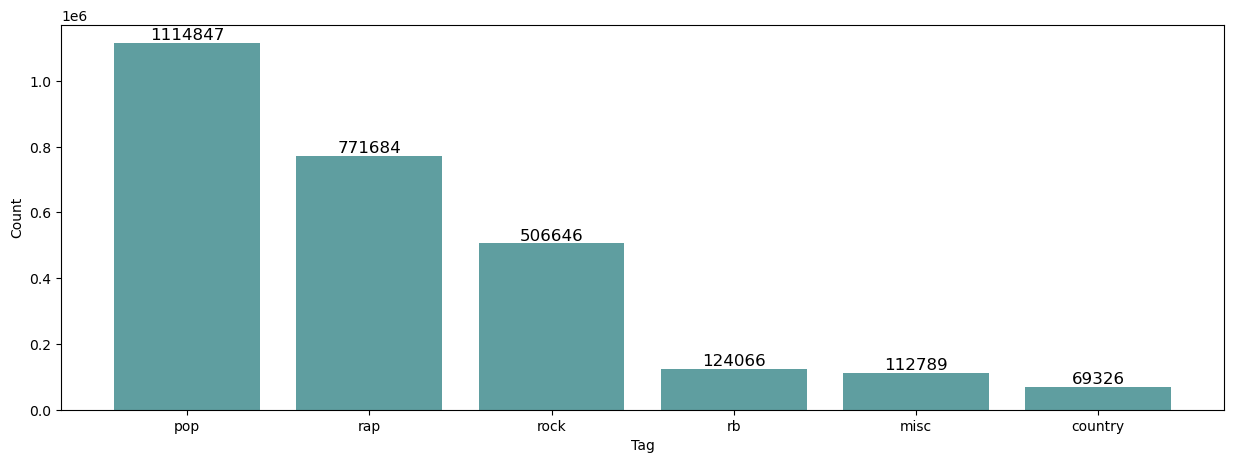

In [17]:
fig, ax = plt.subplots()
plot_bar_chart(ax, train, 'tag', 'Tag', annotate = True)

### `title`

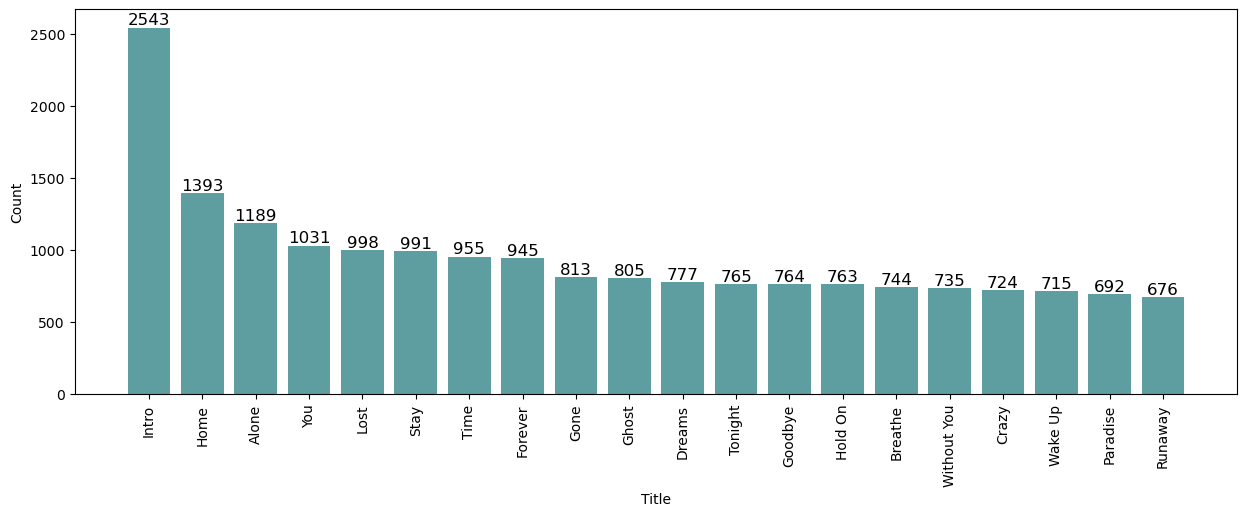

In [18]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_bar_chart(ax, train, 'title', 'Title', annotate=True, top=20)

### `artist`

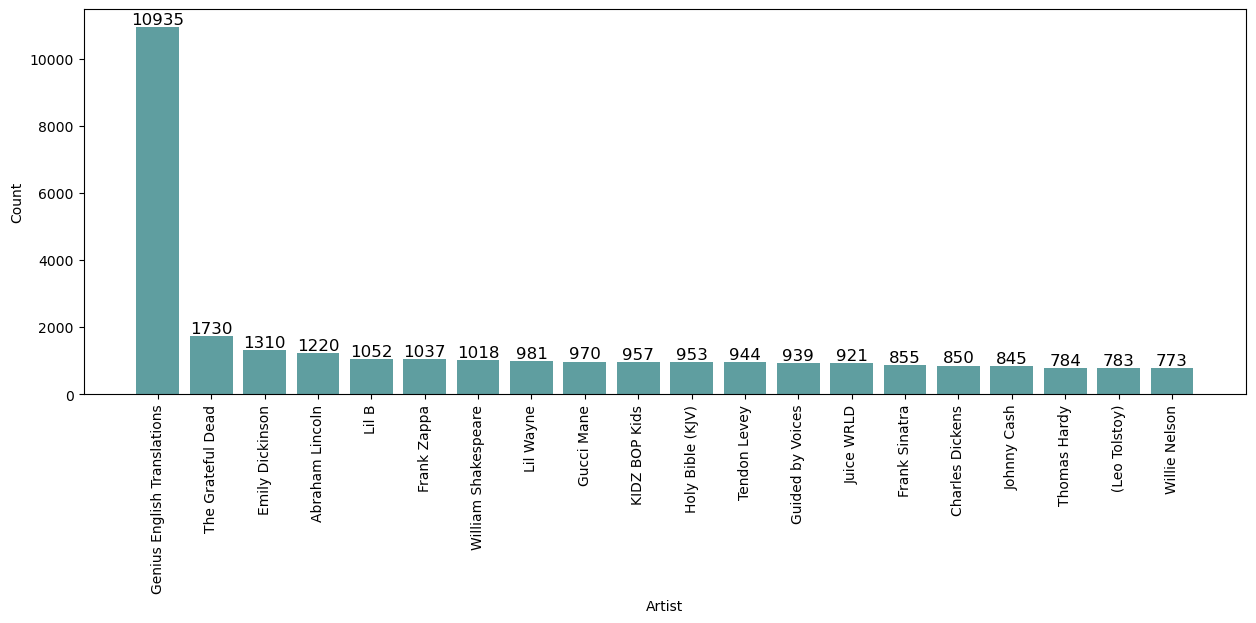

In [19]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_bar_chart(ax, train, 'artist', 'Artist', annotate = True, top=20)

### `features`

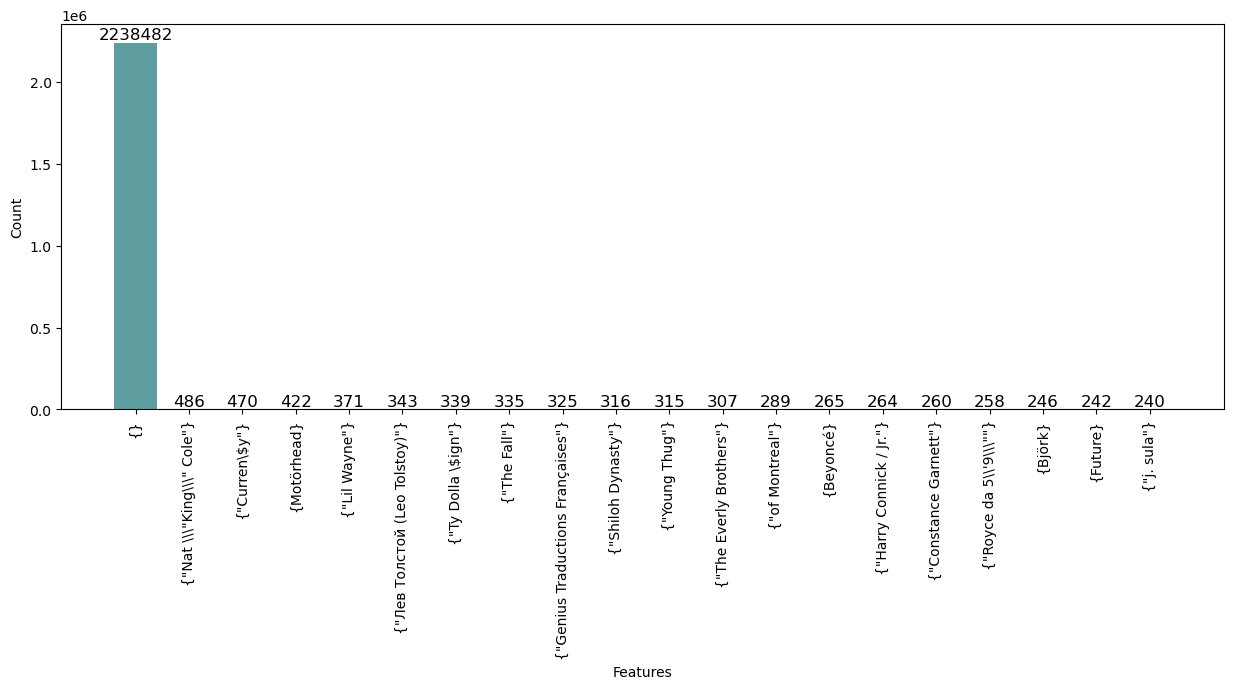

In [21]:
fig, ax = plt.subplots()
plt.xticks(rotation=90)
plot_bar_chart(ax, train, 'features', 'Features', annotate=True, top=20)

In [22]:
train[train['features'].str.contains('Genius')]['features'].value_counts()

{"Genius Traductions Françaises"}                                                                                                           325
{"Polskie tłumaczenia Genius"}                                                                                                              205
{"Genius Brasil Traduções"}                                                                                                                 184
{"Genius 中文翻譯 (Chinese Translations)"}                                                                                                       30
{Genius}                                                                                                                                     17
                                                                                                                                           ... 
{"Boye \\'The Genius\\'",Joeboy}                                                                                                        

### `lyrics`

### `year`

In [23]:
train[train['year'] > 2023]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
7709764,Would you sell love me,pop,Micaela Cain,2024,25,"{""Tate McRae""}","Would you sell love me off i do,t love you, yo..."
7873289,Yahweh Strength Amaziahs song,rap,JayCoBay,2024,1,{},"[intro]\n\nWhen you were just a baby, and I me..."
7644575,RVGER,rap,Cjthadon,2024,4,"{""DO NOT USE IN EMPTY FIELDS""}",Hook\nPulled up inside a v6 twin turbo\nYeah i...
7831187,Instrumental demo_1 LYRICS,rock,Talent on Loan From God,2024,6,{},[Verse 1]\nMagnificent humanity lost in the mu...
400057,Sing in an Irish accent,rap,Tobbly Jones,2027,7,"{""Malachite (Rap)""}",Treehundred tirty tree\nTreehundred tirty tree...
7880927,Millionaire,rap,TheRealJimmyy,2024,10,{},Upcoming artist “ TheRealJimmyy drops a new ho...
7631613,Just obsessed,misc,Saexlee,2024,20,{},"I'm so fucking obsessed with you, I can't lose..."
7766869,Acid Rain Wow,pop,Dounia,2024,275,{},(Chorus)\nSurfing waves in acid rain\nNothing ...
7680512,STRAIGHT FIRE like the oven,rock,Whoops!,2024,52,"{Morgan,Roope,Barnes}",(Yeah LFG on that beat)\n(G-Gamzee Productions...


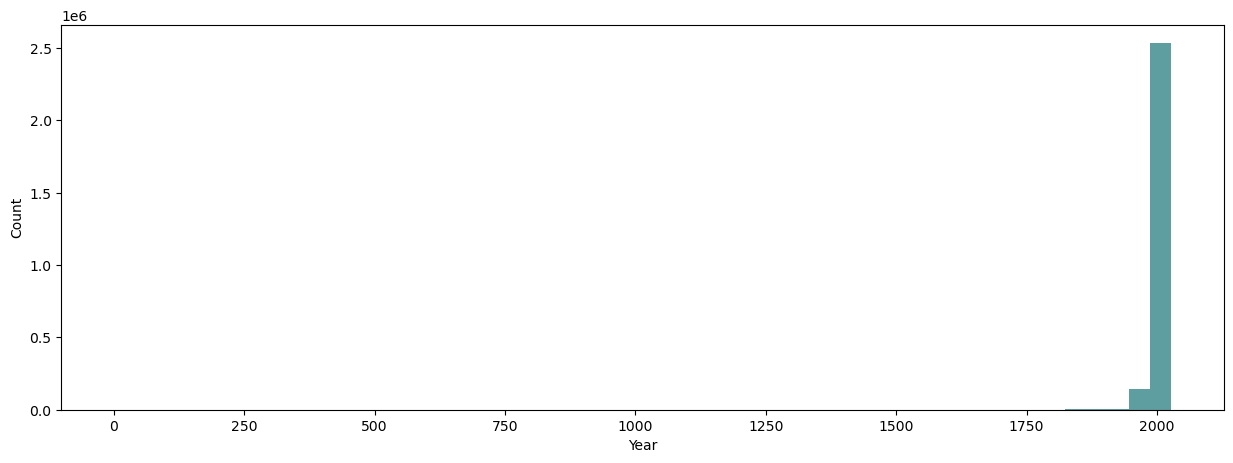

In [24]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'year', 'Year')

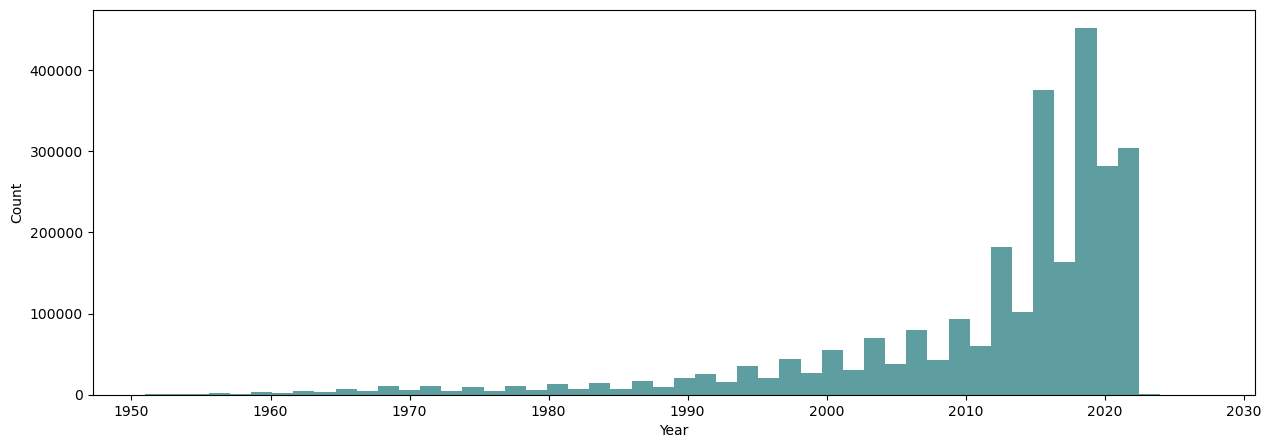

In [25]:
train_o1950 = train[train['year'] > 1950].copy()

fig, ax = plt.subplots()
plot_histogram(ax, train_o1950, 'year', 'Year')

### `views`

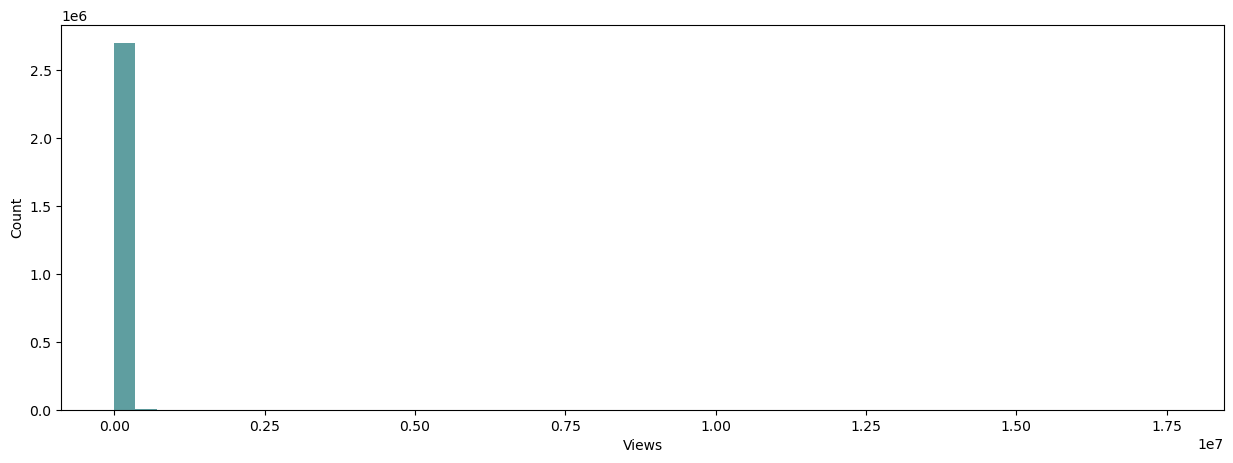

In [26]:
fig, ax = plt.subplots()
plot_histogram(ax, train, 'views', 'Views')

# Text Preprocessing

## Inconsistencies

### `title`

In [86]:
titles_intro = train[(train['title'] == 'Intro') | (train['title'] == 'intro')] #2543+3
titles_intro
# print('Musics named Intro:\n', titles_intro['tag'].value_counts()) #rap

# print('\n')

# titles_w_intro = train[train['title'].str.contains('Intro', na=False)] #10699
# print('Musics with "intro" in the name:\n', titles_w_intro['tag'].value_counts()) #rap

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2043488,Intro,pop,Dolemite,2015,413,{},[Dolemite]\nYes\nThis is for all you no-busine...
6199797,Intro,rap,Yungwa,2020,11,{},It Be The Nigga That Be w The Killers\nThat Ho...
7557267,Intro,rap,niemo,2021,3,{​​nɘiemo},"[Intro: Sample]\nAs a result of the outbreak, ..."
1365961,Intro,rb,TLC,1992,1115,{},"Yeah I, I've seen those girls\nI think they lo..."
4857877,Intro,rap,"Isaiah ""Zay"" Earls",2019,14,"{""Isaiah \\\""Zay\\\"" Earls""}",[Verse 1: Zay]\nLike a big ant to his colony\n...
...,...,...,...,...,...,...,...
6108339,Intro,pop,Ontopic,2020,34,{},"Hey now, you're an all star\nGet your game on,..."
6554019,Intro,rap,Roc Sol,2021,5,"{""Life Is Hectik""}",You ever had a chance or an opportunity that y...
7420099,Intro,rap,Kid Evil,2021,2,{},"Intro\n\nWe love Kid Evil\nYuh, yuh, yuh, yuh,..."


In [64]:
train[train['title'].str.contains(' - ', na=False)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
7287439,Vault Boy vs Mr. Game and Watch - Loco Rap Bat...,rap,Dilly (LRB),2021,23,{ENNWAY},Dilly as Announcer:\nLoco Rap Battles!\nVault ...
4953163,Bags - triple j Like A Version,pop,Dominic Fike,2019,908,{},[Verse 1]\nEvery second counts\nI don't wanna ...
6590391,Big Naughty - Bravo Feat. Coogie G.Soul Engli...,rb,Genius English Translations,2021,51,{},"[Verse 1, Big Naughty]\nLiving my baddest life..."
6541929,Small Things - Live,rock,Ben Howard,2014,12,{},"[Verse 1]\nOh, my mind\nI walk down Mayflower ..."
2229082,Lost Without U - Alternative Version,pop,Robin Thicke,2015,282,{},I'm lost without you\nCan't help myself\nHow d...
...,...,...,...,...,...,...,...
7868913,I Aint Gonna Stand for It Single Version - Alt...,rb,Stevie Wonder,2005,1,{},[Verse 1]\nDon't wanna believe what they're te...
2129018,Set the fire to the third bar - commentary ver...,pop,Snow Patrol,2015,68,{},I find a map and draw a straight line\nOver ri...
500815,Citizen Kane - Opening Narration,misc,Herman J. Mankiewicz and Orson Welles,1941,15,"{""Orson Welles""}",[Charles Foster Kane]\nIn Xanadu did Kubla Kha...


### `artist`

In [ ]:
train[train['artist'].str.contains('Genius')]['artist'].value_counts()

Genius English Translations     10935
Genius Traductions Franaises      326
Genius Users                      237
Genius                            222
Polskie tumaczenia Genius         205
                                ...  
Jag & Kidd Genius                   1
Rap Genius Polska                   1
Genius_SMT                          1
Genius ManuFACTurers                1
Culture Genius                      1
Name: artist, Length: 234, dtype: int64

In [27]:
train[train['lyrics'].str.contains('{')]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
5352696,Off my mind,rap,Ghost Boy,2019,18,{},"(Taylor, Taylor, Taylor, Taylor, Taylor, Taylo..."
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
...,...,...,...,...,...,...,...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....
178361,Work,rap,Sosay Tha Hustla,2013,64,{},{Hook} Good weed and expensive retail\nMY name...
4481093,Amnesia,rap,Andrsn CK,2019,126,{},"[Intro]\nOh man, this broad\nWhy would she thi..."


In [28]:
train[train['lyrics'].str.contains('}')]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
5678774,Wonderful,rock,Sun Arcana,2017,34,{},[Guitar Solo]\n\n[Verse One]\nI feel you desol...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
6741178,Undone,rock,Sapphire Solace,2016,1,{},[Verse 1]\nHow many time have you listened\nTo...
...,...,...,...,...,...,...,...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....
4685208,Circus,pop,Rstir,2018,4,{Rstíðir},"[Verse}\nOpen spaces, feels like home\nMerging..."
178361,Work,rap,Sosay Tha Hustla,2013,64,{},{Hook} Good weed and expensive retail\nMY name...


In [29]:
train[train['lyrics'].str.contains('\{.*\}', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
5352696,Off my mind,rap,Ghost Boy,2019,18,{},"(Taylor, Taylor, Taylor, Taylor, Taylor, Taylo..."
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
...,...,...,...,...,...,...,...
4633052,Gods Got it,rap,Latter Rain,2019,83,{},"Andrae Crouch:\n""I found Jesus Christ to be a ..."
815508,Ladies Gents feat. Snoop Doggy Dogg,pop,Angie Martinez,2015,126,{},Featuring snoop doog\n\n(pa-ra-ra-ra)..\n(pa-r...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....


In [30]:
train[train['lyrics'].str.contains('\{.+\}', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
4127352,Pain Away,rap,DREW.,2018,17,{},{Hook}\n\n(Look)\nTake the pain away\nTake the...
2175606,Alone In This World Remix,rb,Faith Evans,2002,739,{JAY-Z},"{Jay-Z Intro}\nOld school, new school need to ..."
5497990,Falln 4 U,rap,Jacob Yung,2021,119,"{Swoon,""Andrea Chahayed""}","[Intro - Swoon]\nBreak gold, make gold that’s ..."
5352696,Off my mind,rap,Ghost Boy,2019,18,{},"(Taylor, Taylor, Taylor, Taylor, Taylor, Taylo..."
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
...,...,...,...,...,...,...,...
4633052,Gods Got it,rap,Latter Rain,2019,83,{},"Andrae Crouch:\n""I found Jesus Christ to be a ..."
815508,Ladies Gents feat. Snoop Doggy Dogg,pop,Angie Martinez,2015,126,{},Featuring snoop doog\n\n(pa-ra-ra-ra)..\n(pa-r...
47046,Big Booty,rap,Ultramagnetic MC's,1993,1213,"{""Ultramagnetic MC\\'s""}",[porno movie girl]\nUhh.. yeah come on\nOoooh....


In [61]:
# train[train['title'].str.contains('feat', na=False)] #8411
# train[train['title'].str.contains('Featuring', na=False)] #8411
train[train['title'].str.contains('Feat\.|feat\.|featuring|Featuring', na=False, regex=True)] #7686
# train[(train['title'].str.contains('feat', na=False)) & (~train['title'].str.contains('feat.', na=False, regex=False))]
#  & (~train['title'].str.contains('Defeat', na=False))

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
6137993,Love me 2 feat. Yung suxge King T$F Capttain,rap,oung jay,2020,8,"{""Yung Suxge"",""King T\\$F"",Capttain,""¥oung jay""}",(I really miss you\nI dont know why you ain't ...
6590391,Big Naughty - Bravo Feat. Coogie G.Soul Engli...,rb,Genius English Translations,2021,51,{},"[Verse 1, Big Naughty]\nLiving my baddest life..."
4828110,Dmv featuring Common Denominator,rock,Reggie and the Full Effect,2013,84,{},"Hello, Americans!\nThis is Klaus from Common D..."
4476131,Day 1s feat. Prenze Proffit,rap,Hanad Bandz,2019,1736,"{Proffit,Prenze}",(Hook: Hanad Bandz)\nI been balling every day ...
4235997,So Good Featuring Xzibit,rap,Davina,1997,305,{Xzibit},Davina ft. Xzibit - “So Good (Featuring Xzibit...
...,...,...,...,...,...,...,...
5712817,Young Simba feat. Yelhomie,rap,Simba LEI,2020,126,{Yelhomie},Verse [Simba LEI]\n\nWhoever's got your back\n...
2262565,We Will Rock You feat. Craft,pop,Space dogs,2015,16,{},Buddy you're a boy make a big noise\nPlayin' i...
4034534,O Holy Night feat. Jaye Thomas Naomi Rizzo,pop,Justin Rizzo,2014,80,"{""Jaye Thomas"",""Naomi Rizzo""}",[Verse 1: Justin & Naomi]\nO holy night the st...


In [38]:
train[train['lyrics'].str.contains('\[.*}', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
5678774,Wonderful,rock,Sun Arcana,2017,34,{},[Guitar Solo]\n\n[Verse One]\nI feel you desol...
6741178,Undone,rock,Sapphire Solace,2016,1,{},[Verse 1]\nHow many time have you listened\nTo...
7328148,Victim,rock,Wave Of Discord,2021,6,{},[Verse}\nVictim\nAfraid of being picked apart\...
6540775,Thank You Tracee Ellis Ross,rap,KeithCharles,2017,213,{},Y'all niggas got the game fucked up\nY'all nig...
4615061,Dandy,pop,Little Lunch,2019,364,{},[Verse 1]\nI can see\nIt was so clear\nFading ...
...,...,...,...,...,...,...,...
7139957,Make It Today,rap,Powderr,2021,10,{},[Hook]\nMake it today that is the biggest mist...
3835004,Lora,rap,Fuckyouposers,2018,130,{},"[Intro}\nAll we dead inside, I got nothing to ..."
4685208,Circus,pop,Rstir,2018,4,{Rstíðir},"[Verse}\nOpen spaces, feels like home\nMerging..."


In [29]:
train[train['lyrics'].str.contains('\{.*]', regex=True)]

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2810830,The Syllable Killer,rap,Mizury Mize,2017,572,{},"[Intro: Mizury] ""People always askin' me ""Miz,..."
7376792,Nokia Phones,rap,Matt Vanzetti & Maz,2021,13,{},{Produced by Maz]\n\n[Chorus] - Matt Vanzetti\...
6734660,Lyin to me,pop,"Althea Noel , Alexie Sandalo",2021,32,"{""Althea Noel"",""Alexie Sandalo"",""Althea Noel /...",[ Intro : Althea Noel ]\n\n[Verse 1 : Althea N...
5945822,Focus,rb,Noah Vernon,2018,9,{},[Intro]\n\nTell me why does it feel like this?...
5649325,Second Base,rap,Daz (Canadian Rapper),2020,59,{},[INTRO]\n\nGayboy on the track\n\n{CHORUS]\n\n...
...,...,...,...,...,...,...,...
5415857,NEVER MET AGAIN,rap,Snakepitch,2019,81,{},[Verse]\nScale my shit 2 the max\nBreak my bit...
4170379,T-Shirt,rap,Smokingskul,2018,30,{},[Hook: Smokingskul]\nYo bitch slide the pussy ...
4162887,Casa Del,pop,Olympic Ayres,2011,58,{},[Verse 1]\nWould I falter your happiness?\nSai...


In [7]:
train_sample = train.sample(int(len(train)*0.1), random_state=21)
train_sample

,title,tag,artist,year,views,features,lyrics
id,,,,,,,
2422539,Paranoia,rap,Nice & Smooth,1991,402,{},[Greg Nice]\nA teeny weeny midget fell in a we...
3102046,Pegleg Potion,rock,Alestorm,2017,4734,{},[Verse 1]\nFar away in a secret cove\nIn the l...
6645560,Does Having So Many Faces Make You Great?,rock,Year Twins,2021,18,{},[Verse 1]\nYou're not sleeping enough\nNow you...
238664,Untimely Leave,misc,Rabindranath Tagore,2013,8,{},"No more noisy, loud words from me---such is my..."
1595836,Universal,pop,Borknagar,1998,176,{},Mountains higher than mind can fly\nOceans dee...
...,...,...,...,...,...,...,...
1305817,Entering The Fluid Oxygen,pop,Troll,2001,27,{},"The sun and I, the watchtower of tranquility\n..."
1754593,You Found Another Lover I Lost Another Friend ...,pop,Ben Harper & Charlie Musselwhite,2015,21,{},I sit here in a daze\nWishing I could change m...
7763575,Exotics Raw,rap,Neek the Exotic,1998,12,{},[Hook: Large Professor} (2x)\nYo exotic is raw...


## Data Transformation

In [8]:
train_sample['lyrics'] = train_sample['lyrics'].astype(str)

## Cleaning & Normalization

Lower Case

In [9]:
train_sample['lyrics'] = train_sample['lyrics'].str.lower()

Removing Special Characters, Punctuations & URLs

In [10]:
def sub_remove(text):
    x = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)
    return(x)

In [11]:
train_sample['lyrics'] = train_sample['lyrics'].apply(sub_remove)

Removing white spaces

In [12]:
def sub_spaces(text):
    x = re.sub(r' +', ' ', text)
    return(x)

In [13]:
train_sample['lyrics'] = train_sample['lyrics'].apply(sub_spaces)

## Tokenization

In [14]:
regexp = RegexpTokenizer('\w+')

In [15]:
train_sample['lyrics_token'] = train_sample['lyrics'].apply(regexp.tokenize)

## Stopwords removal

In [16]:
stopwords = stopwords.words('english')

In [17]:
# Remove stopwords
train_sample['lyrics_token_filtered'] = train_sample['lyrics_token'].apply(lambda x: [item for item in x if item not in stopwords])

In [18]:
train_sample['lyrics_filtered_string'] = train_sample['lyrics_token_filtered'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))

In [19]:
all_words = ' '.join([word for word in train_sample['lyrics_filtered_string']])

In [20]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [21]:
fdist = FreqDist(tokenized_words)

In [22]:
train_sample['lyrics_string_fdist'] = train_sample['lyrics_token_filtered'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 4]))

In [23]:
train_sample.iloc[:,6:]

,lyrics,lyrics_token,lyrics_token_filtered,lyrics_filtered_string,lyrics_string_fdist
id,,,,,
2422539,greg nicea teeny weeny midget fell in a welli ...,"[greg, nicea, teeny, weeny, midget, fell, in, ...","[greg, nicea, teeny, weeny, midget, fell, well...",greg nicea teeny weeny midget fell welli knew ...,greg nicea teeny weeny midget fell welli knew ...
3102046,verse 1far away in a secret covein the land of...,"[verse, 1far, away, in, a, secret, covein, the...","[verse, 1far, away, secret, covein, land, scru...",verse 1far away secret covein land scrubadoowe...,verse 1far away secret land hide mighty pirate...
6645560,verse 1youre not sleeping enoughnow you wont e...,"[verse, 1youre, not, sleeping, enoughnow, you,...","[verse, 1youre, sleeping, enoughnow, wont, eve...",verse 1youre sleeping enoughnow wont even tryt...,verse 1youre sleeping enoughnow wont even tryt...
238664,no more noisy loud words from mesuch is my mas...,"[no, more, noisy, loud, words, from, mesuch, i...","[noisy, loud, words, mesuch, masters, willhenc...",noisy loud words mesuch masters willhenceforth...,noisy loud words mesuch masters deal whisperst...
1595836,mountains higher than mind can flyoceans deepe...,"[mountains, higher, than, mind, can, flyoceans...","[mountains, higher, mind, flyoceans, deeper, s...",mountains higher mind flyoceans deeper sorrowa...,mountains higher mind deeper sorrowa distance ...
...,...,...,...,...,...
1305817,the sun and i the watchtower of tranquilitycop...,"[the, sun, and, i, the, watchtower, of, tranqu...","[sun, watchtower, tranquilitycopy, sane, solut...",sun watchtower tranquilitycopy sane solutions ...,sun watchtower sane solutions overcomea deeper...
1754593,i sit here in a dazewishing i could change my ...,"[i, sit, here, in, a, dazewishing, i, could, c...","[sit, dazewishing, could, change, waysand, let...",sit dazewishing could change waysand lets pret...,sit could change waysand lets pretend isnt isi...
7763575,hook large professor 2xyo exotic is raw crazy ...,"[hook, large, professor, 2xyo, exotic, is, raw...","[hook, large, professor, 2xyo, exotic, raw, cr...",hook large professor 2xyo exotic raw crazy har...,hook large professor exotic raw crazy hardcore...
